In [57]:
import numpy as np
import pandas as pd

In [58]:
np.random.seed(5)

In [59]:
# Now we want to create a couple of graphs. In practice, we start setting the number of nodes for each graph.

length_s = 30
length_t = 50

# For each couple of nodes in a graph we generate a random natural number between 0 and 100.

matrix_s = np.zeros((length_s, length_s))
matrix_t = np.zeros((length_t, length_t))


# We also want our graphs to be representative of reality (i.e. graphs are usually sparse).

for i in range(length_s):
    for j in range(i):
        rnd = np.random.randint(1, 101)
        unif = np.random.rand()
        if unif > 0.6:
            matrix_s[i][j] = rnd
            matrix_s[j][i] = rnd
        else:
            matrix_s[i][j] = 0
            matrix_s[j][i] = 0


for i in range(length_s):
    for j in range(i):
        rnd = np.random.randint(1, 101)
        unif = np.random.rand()
        if unif > 0.6:
            matrix_t[i][j] = rnd
            matrix_t[j][i] = rnd
        else:
            matrix_t[i][j] = 0
            matrix_t[j][i] = 0



print(matrix_s)
print("\n")
print(matrix_t)

[[ 0.  0.  0. 63. 54.  0.  5. 68. 17.  0.  0.  0. 88. 83. 76. 75. 84. 43.
   0.  0. 46. 47.  0.  0. 37.  2.  0. 48. 30. 75.]
 [ 0.  0. 17.  0.  0.  0.  0. 56. 46. 45. 14. 58.  0.  0.  0.  0.  0. 49.
  77. 12. 35.  0.  0. 76. 59.  0.  0.  0.  0.  0.]
 [ 0. 17.  0.  0. 76. 63.  0. 79.  0. 95.  0.  0.  0.  0.  0. 68.  0. 11.
   6.  0. 70.  0.  0.  0. 59. 96.  7.  0.  0. 53.]
 [63.  0.  0.  0.  0.  0.  0. 34.  0. 23. 23.  0. 65.  0.  3.  0. 79.  0.
   0. 48.  0. 35.  0. 30.  0. 87. 89.  0.  0.  0.]
 [54.  0. 76.  0.  0.  0.  8.  8.  0.  0. 93.  0.  2.  0.  0. 31.  0.  0.
  19.  0.  0.  0.  0.  0.  0.  0. 68. 49. 32.  0.]
 [ 0.  0. 63.  0.  0.  0.  0.  0. 48.  0.  0.  0. 24.  0.  0.  0.  0.  0.
  96.  0.  0. 57.  0.  0.  0.  0.  0. 63.  0.  0.]
 [ 5.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0. 33. 69.  0. 38.  0.  0.  0.
   0.  0.  0.  0.  0.  0. 43.  0.  0.  6.  0.  0.]
 [68. 56. 79. 34.  8.  0.  0.  0.  0. 71.  0. 70. 92. 58.  0.  0. 74. 55.
   0.  0. 22. 52. 87.  0.  0.  0.  1. 49. 15.  0.]


In [60]:
# Now we want to give a weight to each node in each matrix. In particulare if a node has a lot of connections, it should have a weight which is linear wrt the sum of its edges.

M_s = []
M_t = []

for i in range(length_s):
    s = sum(matrix_s[i,:])
    M_s.append(s)
M_s = M_s/sum(M_s)


for i in range(length_t):
    s = sum(matrix_t[i,:])
    M_t.append(s)
M_t = M_t/sum(M_t)


print(M_s)
print("\n")
print(M_t)

[0.05331445 0.03082153 0.03966006 0.03280453 0.02492918 0.01988669
 0.01144476 0.05048159 0.02946176 0.03093484 0.0215864  0.02883853
 0.04866856 0.04402266 0.03167139 0.02974504 0.02838527 0.02328612
 0.04186969 0.03371105 0.03558074 0.02929178 0.02747875 0.02481586
 0.02645892 0.04504249 0.04322946 0.03750708 0.02555241 0.04951841]


[0.01427539 0.0328876  0.0159017  0.04294663 0.03228527 0.05053608
 0.02903265 0.02794844 0.0266233  0.02541862 0.03276714 0.02939405
 0.0477051  0.0595109  0.05149982 0.03385134 0.02318998 0.01722684
 0.03065896 0.03903144 0.04162149 0.03240573 0.04680159 0.02379231
 0.03860981 0.01999759 0.03656186 0.0382484  0.02596073 0.03330924
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [61]:
# This are matrices which represent the similitude between nodes.

C_s = 1/(1 + matrix_s)

C_t = 1/(1 + matrix_t)

print(matrix_s)
print("\n")
print(matrix_t)

[[ 0.  0.  0. 63. 54.  0.  5. 68. 17.  0.  0.  0. 88. 83. 76. 75. 84. 43.
   0.  0. 46. 47.  0.  0. 37.  2.  0. 48. 30. 75.]
 [ 0.  0. 17.  0.  0.  0.  0. 56. 46. 45. 14. 58.  0.  0.  0.  0.  0. 49.
  77. 12. 35.  0.  0. 76. 59.  0.  0.  0.  0.  0.]
 [ 0. 17.  0.  0. 76. 63.  0. 79.  0. 95.  0.  0.  0.  0.  0. 68.  0. 11.
   6.  0. 70.  0.  0.  0. 59. 96.  7.  0.  0. 53.]
 [63.  0.  0.  0.  0.  0.  0. 34.  0. 23. 23.  0. 65.  0.  3.  0. 79.  0.
   0. 48.  0. 35.  0. 30.  0. 87. 89.  0.  0.  0.]
 [54.  0. 76.  0.  0.  0.  8.  8.  0.  0. 93.  0.  2.  0.  0. 31.  0.  0.
  19.  0.  0.  0.  0.  0.  0.  0. 68. 49. 32.  0.]
 [ 0.  0. 63.  0.  0.  0.  0.  0. 48.  0.  0.  0. 24.  0.  0.  0.  0.  0.
  96.  0.  0. 57.  0.  0.  0.  0.  0. 63.  0.  0.]
 [ 5.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0. 33. 69.  0. 38.  0.  0.  0.
   0.  0.  0.  0.  0.  0. 43.  0.  0.  6.  0.  0.]
 [68. 56. 79. 34.  8.  0.  0.  0.  0. 71.  0. 70. 92. 58.  0.  0. 74. 55.
   0.  0. 22. 52. 87.  0.  0.  0.  1. 49. 15.  0.]


In [72]:
d = 3
beta = 0.5
gamma = 0.5
inner_n = 50
outer_n = 80

In [73]:
OT = np.outer(M_s, M_t)
correspondence = OT.copy()
print(OT)

for i in range(length_s):
    for j in range(length_t):
        if correspondence[i][j] == max(OT[i,:]):
            correspondence[i][j] = 1
        else:
            correspondence[i][j] = 0

correspondence

[[0.00076108 0.00175338 0.00084779 ... 0.         0.         0.        ]
 [0.00043999 0.00101365 0.00049011 ... 0.         0.         0.        ]
 [0.00056616 0.00130432 0.00063066 ... 0.         0.         0.        ]
 ...
 [0.00053543 0.00123352 0.00059643 ... 0.         0.         0.        ]
 [0.00036477 0.00084036 0.00040633 ... 0.         0.         0.        ]
 [0.00070689 0.00162854 0.00078743 ... 0.         0.         0.        ]]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
lambda_reg = 0.001

In [75]:
def GWL_simple(C_s, C_t, M_s, M_t, beta, gamma, d, inner_n, outer_n, lambda_reg):
    """
    Simplified Gromov-Wasserstein Learning (GWL) with entropy-regularized cost, embedding updates,
    and regularization R(X_s, X_t).
    
    Parameters:
    - C_s: Cost matrix for source graph (length_s x length_s). 
    - C_t: Cost matrix for target graph (length_t x length_t).
    - M_s: Marginal distribution for source graph (length_s,).
    - M_t: Marginal distribution for target graph (length_t,).
    - beta: Regularization parameter for Sinkhorn iterations.
    - gamma: Regularization parameter for entropy term.
    - alpha: Weight for embedding-level cost regularization.
    - d: Dimension of the embeddings.
    - inner_n: Number of inner Sinkhorn iterations.
    - outer_n: Number of outer embedding updates.
    - lambda_reg: Regularization weight for R(X_s, X_t).
    """
    length_s, length_t = C_s.shape[0], C_t.shape[0]

    # Initialize embeddings
    embed_s = np.random.rand(d, length_s) * 5
    embed_t = np.random.rand(d, length_t) * 5

    # Initialize transport matrix
    T = np.outer(M_s, M_t)

    for m in range(outer_n):
        alpha_m = m / outer_n  # Gradual interpolation weight

        # Inner loop: Update transport matrix T using entropy regularization
        for n in range(inner_n):
            # Compute embedding-level cost
            K_embed = np.zeros((length_s, length_t))
            for i in range(length_s):
                for j in range(length_t):
                    K_embed[i, j] = np.sum((embed_s[:, i] - embed_t[:, j]) ** 2)

            # Compute graph-level cost
            graph_cost = C_s @ T @ C_t.T
            C_mn = graph_cost + alpha_m * K_embed + gamma

            # Add entropy regularization term
            C_reg = C_mn - gamma * np.log(T + 1e-8)
            
            # Sinkhorn update
            kernel = np.exp(-C_reg / beta)
            a = np.ones(length_s)
            for _ in range(inner_n):
                b = M_t / (kernel.T @ a)
                a = M_s / (kernel @ b)

            T = np.diag(a) @ kernel @ np.diag(b)

        # Update embeddings by minimizing α_m <K(X_s, X_t), T> + β R(X_s, X_t)
        for _ in range(10):  # Gradient descent steps
            # Compute gradients of K(X_s, X_t)
            grad_s = np.zeros_like(embed_s)
            grad_t = np.zeros_like(embed_t)
            for i in range(length_s):
                for j in range(length_t):
                    grad_s[:, i] += 2 * T[i, j] * (embed_s[:, i] - embed_t[:, j])
                    grad_t[:, j] += 2 * T[i, j] * (embed_t[:, j] - embed_s[:, i])

            # Add gradients of R(X_s, X_t)
            for i in range(length_s):
                for j in range(length_s):
                    grad_s[:, i] += lambda_reg * 4 * ((np.sum((embed_s[:, i] - embed_s[:, j]) ** 2) - C_s[i, j]) *
                                                      (embed_s[:, i] - embed_s[:, j]))

            for i in range(length_t):
                for j in range(length_t):
                    grad_t[:, i] += lambda_reg * 4 * ((np.sum((embed_t[:, i] - embed_t[:, j]) ** 2) - C_t[i, j]) *
                                                      (embed_t[:, i] - embed_t[:, j]))

            # Gradient descent step
            embed_s -= alpha_m * grad_s
            embed_t -= alpha_m * grad_t

    # Compute final loss
    final_cost = np.sum(T * C_mn)
    entropy = -np.sum(T * np.log(T + 1e-8))
    total_loss = final_cost - gamma * entropy

    # Graph matching
    correspondence = np.zeros_like(T)
    for i in range(length_s):
        max_idx = np.argmax(T[i, :])
        correspondence[i, max_idx] = 1

    return embed_s, embed_t, T, correspondence, total_loss


In [76]:
embed_s, embed_t, OT, correspondence, total_loss = GWL_simple(C_s, C_t, M_s, M_t, beta, gamma, d, inner_n, outer_n, lambda_reg)

In [77]:
embed_t

array([[2.59115329, 3.14542497, 2.51907205, 2.22067059, 2.60162513,
        2.55738427, 2.46604677, 2.17016199, 3.09761417, 3.04418617,
        2.57602333, 2.6546308 , 2.66361886, 2.51153463, 2.76936452,
        2.48911279, 2.96906368, 3.12189024, 3.10038027, 2.87219139,
        2.53360064, 2.4439777 , 2.28887103, 2.39013496, 2.59892015,
        2.76174234, 2.83175056, 2.22246381, 2.55638336, 2.54336707,
        2.39461304, 3.32052777, 2.77434045, 2.96463134, 2.37926279,
        3.30926523, 3.03245903, 3.32629172, 2.35042357, 2.3301566 ,
        3.1200591 , 2.81029894, 2.51416132, 3.31105977, 2.99174263,
        3.07986778, 2.44449517, 2.5125088 , 3.08376772, 2.38338702],
       [2.8674774 , 2.43268177, 2.17322376, 2.51152183, 2.11770667,
        2.11962647, 2.81148888, 2.33381082, 2.36881994, 2.45031194,
        2.84159198, 2.73972035, 2.7834181 , 2.62779951, 2.81874227,
        2.83885383, 2.81008566, 2.53266943, 2.57680632, 2.82535313,
        2.6887673 , 2.77069674, 2.27865473, 2.3

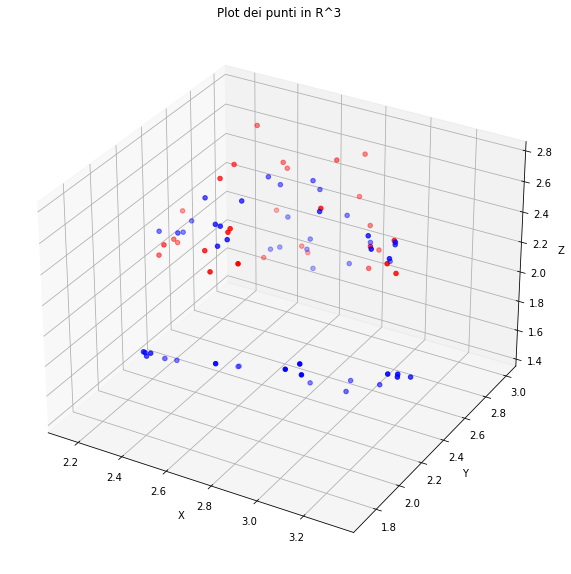

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generiamo una matrice casuale 3x30
matrix = embed_s

# Creiamo un plot in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Estrarre le coordinate dei punti
x = matrix[0, :]
y = matrix[1, :]
z = matrix[2, :]

# Scatter plot dei punti
ax.scatter(x, y, z, color='r',marker='o')

x2=embed_t[0,:]
y2 = embed_t[1,:]
z2 = embed_t[2,:]
ax.scatter(x2,y2,z2, color='b',marker='o')



# Etichette degli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Titolo
ax.set_title('Plot dei punti in R^3')

plt.show()

In [79]:
import numpy as np
import plotly.graph_objects as go

# Etichette per embed_s e embed_t
labels_s = [f'S{i}' for i in range(embed_s.shape[1])]
labels_t = [f'T{i}' for i in range(embed_t.shape[1])]

# Creiamo il grafico scatter interattivo
fig = go.Figure()

# Aggiungi i punti della prima matrice (embed_s) in rosso
fig.add_trace(go.Scatter3d(
    x=embed_s[0, :],
    y=embed_s[1, :],
    z=embed_s[2, :],
    mode='markers+text',
    marker=dict(size=5, color='red'),
    text=labels_s,  # Etichette per ogni punto
    textposition='top center',
    name='embed_s'
))

# Aggiungi i punti della seconda matrice (embed_t) in blu
fig.add_trace(go.Scatter3d(
    x=embed_t[0, :],
    y=embed_t[1, :],
    z=embed_t[2, :],
    mode='markers+text',
    marker=dict(size=5, color='blue'),
    text=labels_t,  # Etichette per ogni punto
    textposition='top center',
    name='embed_t'
))

# Personalizzazione del layout
fig.update_layout(
    title='Interactive 3D Scatter Plot',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Mostra il grafico
fig.show()


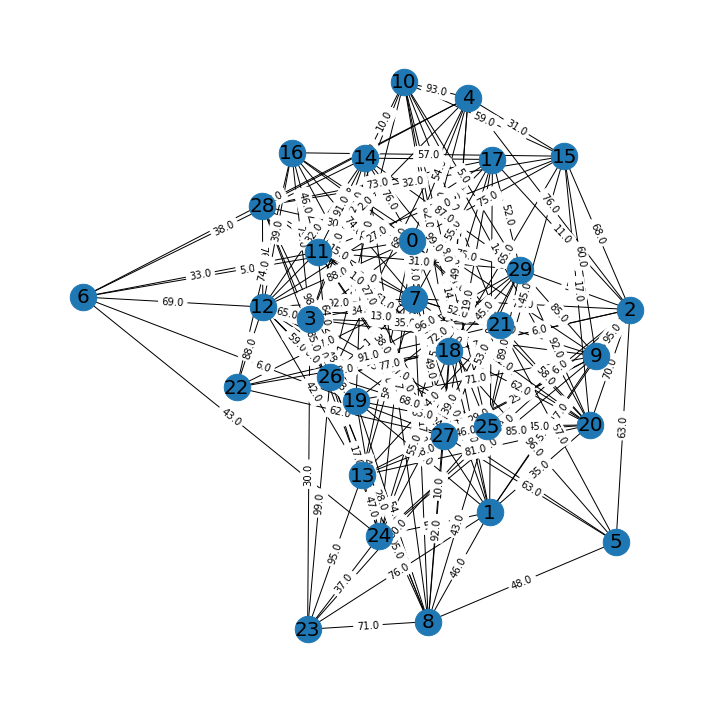

In [85]:
G=nx.from_numpy_array(matrix_s)
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility


f=plt.figure(figsize=(10,10))
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, width=1)


# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [83]:
M_s

array([0.05331445, 0.03082153, 0.03966006, 0.03280453, 0.02492918,
       0.01988669, 0.01144476, 0.05048159, 0.02946176, 0.03093484,
       0.0215864 , 0.02883853, 0.04866856, 0.04402266, 0.03167139,
       0.02974504, 0.02838527, 0.02328612, 0.04186969, 0.03371105,
       0.03558074, 0.02929178, 0.02747875, 0.02481586, 0.02645892,
       0.04504249, 0.04322946, 0.03750708, 0.02555241, 0.04951841])